# Week 6 - Galaxy Classification
#### 

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from support_functions import generate_features_targets, plot_confusion_matrix, calculate_accuracy

### Loading the Galaxy Zoo Data

In [5]:
data = np.load('galaxy_catalogue.npy')

###### 
### Splitting the train and test sets

In [6]:
def splitdata_train_test(data, fraction_training):
  np.random.shuffle(data)
  split = int(fraction_training*len(data))
  training_set, testing_set = data[:split], data[split:]
  return training_set, testing_set
  

# set the fraction of data which should be in the training set
fraction_training = 0.7

# split the data using your function
training, testing = splitdata_train_test(data, fraction_training)

# print the key values
print('Number data galaxies:', len(data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


###### 
### Generating features and targets

In [7]:
def generate_features_targets(data):
  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u'] 
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


features, targets = generate_features_targets(data)

# Print the shape of each array to check the arrays are the correct dimensions
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


###### 
### Train the decision tree classifier

In [8]:
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  train_set, test_set = splitdata_train_test(data, 0.7)
  
  # generate the feature and targets for the training and test sets
  train_features, train_targets = generate_features_targets(train_set)
  test_features, test_targets = generate_features_targets(test_set)
  
  # instantiate a decision tree classifier
  model = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  model.fit(train_features, train_targets)
  
  # get predictions for the test_features
  predictions = model.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets


predicted_class, actual_class = dtc_predict_actual(data)

# Print some of the initial results
print("Some initial results...\n\n   predicted,  actual")
for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))


Some initial results...

   predicted,  actual
0. spiral, spiral
1. merger, merger
2. spiral, spiral
3. elliptical, elliptical
4. merger, merger
5. spiral, spiral
6. spiral, spiral
7. merger, merger
8. merger, spiral
9. merger, merger


###### 
### Accuracy in classification

Our accuracy score: 0.7923076923076923
Confusion matrix, without normalization
[[232   4  24]
 [  4 206  50]
 [ 26  54 180]]


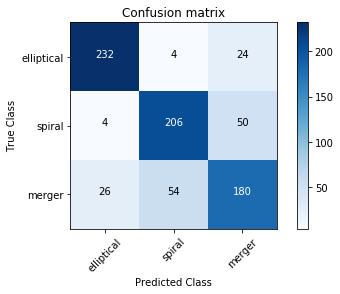

In [9]:
def calculate_accuracy(predicted, actual):
  correct = actual[predicted == actual]
  return len(correct)/len(predicted)

features, targets = generate_features_targets(data)

# train the model to get predicted and actual classes
dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()

###### 
### Random Forest Classifier

Accuracy score: 0.8653846153846154
Confusion matrix, without normalization
[[245   1  14]
 [  1 218  41]
 [ 16  32 212]]


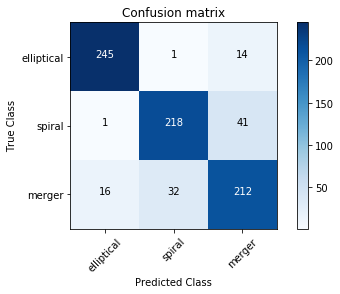

In [10]:
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instantiate a random forest classifier using n estimators
  rfc = RandomForestClassifier(n_estimators = n_estimators)
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predictions = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predictions, targets


# get the predicted and actual classes
number_estimators = 50              # Number of trees
predicted, actual = rf_predict_actual(data, number_estimators)

# calculate the model score using your function
accuracy = calculate_accuracy(predicted, actual)
print("Accuracy score:", accuracy)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

# plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()